In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
pipimport pandas_profiling

/var/folders/cw/fy71d9fd77lcbtw22gmkb9hh0000gn/T/ipykernel_39063/4275678774.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [326]:
df = pd.read_csv("/Users/zachpinto/Desktop/dev/fast_food_nutrition_calculator/data/raw/FastFoodNutritionMenuV2.csv")
df

,company,item,calories,calories_from_fat,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbs,fiber,sugar,protein,weight_watcher_points
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Me...,230,NaN,10,4.5,0,25,390,25,2,1,11,NaN
1144,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Large,310,NaN,13,6,0,35,540,33,2,1,15,NaN
1145,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Small,120,NaN,4,1.5,0,10,230,17,1,1,5,NaN
1146,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Medium,200,NaN,6,2.5,0,15,370,27,2,2,8,NaN


In [327]:
df.columns = df.columns.str.replace('\n', ' ').str.strip()

missing_values = df.isnull().sum()

non_numeric_entries = df.applymap(lambda x: not str(x).replace('.', '', 1).isdigit()).sum()

In [328]:
df

,company,item,calories,calories_from_fat,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbs,fiber,sugar,protein,weight_watcher_points
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Me...,230,NaN,10,4.5,0,25,390,25,2,1,11,NaN
1144,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Large,310,NaN,13,6,0,35,540,33,2,1,15,NaN
1145,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Small,120,NaN,4,1.5,0,10,230,17,1,1,5,NaN
1146,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Medium,200,NaN,6,2.5,0,15,370,27,2,2,8,NaN


In [329]:
missing_values

company                    0
item                       0
calories                   1
calories_from_fat        506
total_fat                 57
saturated_fat             57
trans_fat                 57
cholesterol                1
sodium                     1
carbs                     57
fiber                     57
sugar                      1
protein                   57
weight_watcher_points    261
dtype: int64

In [330]:
non_numeric_entries

company                  1148
item                     1148
calories                   15
calories_from_fat         518
total_fat                  69
saturated_fat              70
trans_fat                  69
cholesterol                29
sodium                     16
carbs                      70
fiber                      84
sugar                      30
protein                    69
weight_watcher_points     272
dtype: int64

In [331]:
df.dtypes

company                  object
item                     object
calories                 object
calories_from_fat        object
total_fat                object
saturated_fat            object
trans_fat                object
cholesterol              object
sodium                   object
carbs                    object
fiber                    object
sugar                    object
protein                  object
weight_watcher_points    object
dtype: object

In [332]:
df.columns.tolist()

['company',
 'item',
 'calories',
 'calories_from_fat',
 'total_fat',
 'saturated_fat',
 'trans_fat',
 'cholesterol',
 'sodium',
 'carbs',
 'fiber',
 'sugar',
 'protein',
 'weight_watcher_points']

In [333]:
numeric_columns = [
    'calories',
    'calories_from_fat',
    'total_fat',
    'saturated_fat',
    'trans_fat',
    'cholesterol',
    'sodium',
    'carbs',
    'fiber',
    'sugar',
    'protein',
    'weight_watcher_points'
]

for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                1148 non-null   object 
 1   item                   1148 non-null   object 
 2   calories               1133 non-null   float64
 3   calories_from_fat      630 non-null    float64
 4   total_fat              1079 non-null   float64
 5   saturated_fat          1078 non-null   float64
 6   trans_fat              1079 non-null   float64
 7   cholesterol            1119 non-null   float64
 8   sodium                 1132 non-null   float64
 9   carbs                  1078 non-null   float64
 10  fiber                  1064 non-null   float64
 11  sugar                  1118 non-null   float64
 12  protein                1079 non-null   float64
 13  weight_watcher_points  876 non-null    float64
dtypes: float64(12), object(2)
memory usage: 125.7+ KB


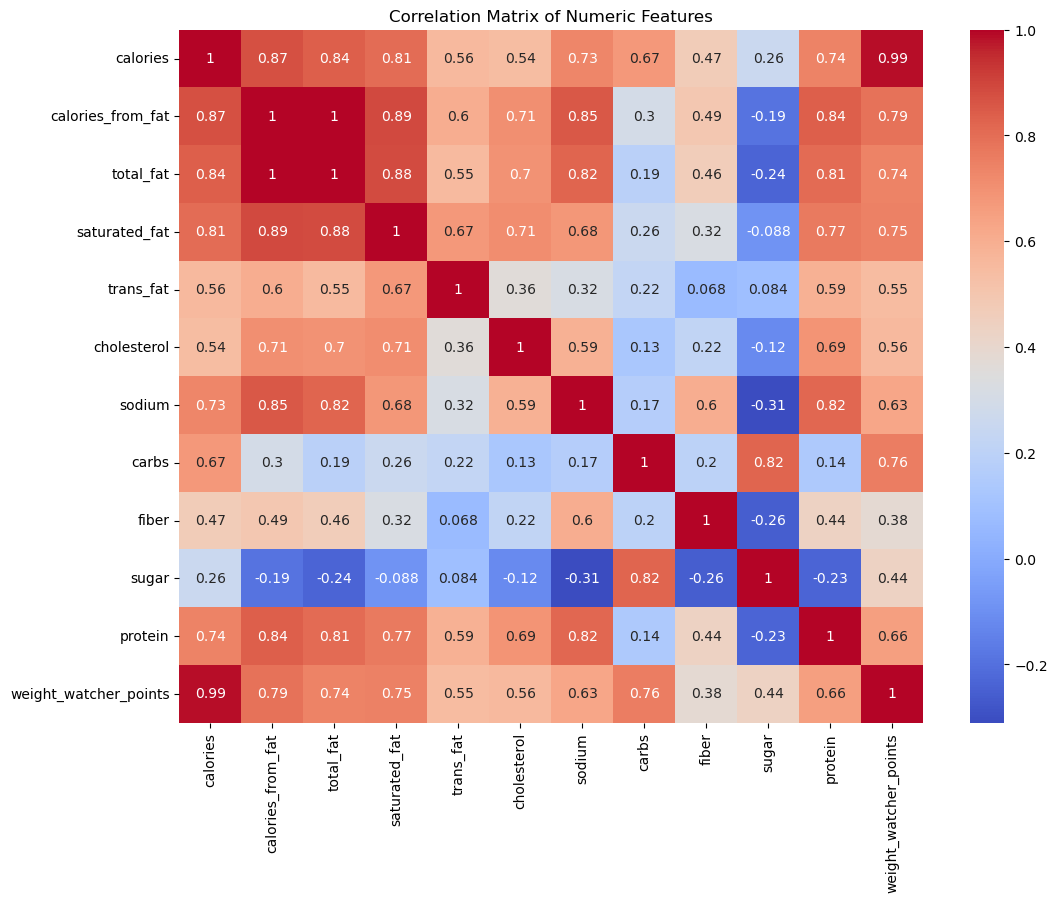

In [334]:
df_numeric = df.drop(['company', 'item'], axis=1)

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


Based on the correlation matrix, we can see:

- Calories has a strong correlation with Calories from Fat, Total Fat (g), Saturated Fat (g), and Weight Watchers Points. This makes it a strong candidate for imputation based on these features.

- Total Fat (g) is strongly correlated with Calories from Fat and Saturated Fat (g).

- Saturated Fat (g) is strongly correlated with Calories from Fat and Total Fat (g).

- Protein (g) is strongly correlated with Calories from Fat, Total Fat (g), and Sodium (mg).

- Sodium (mg) is strongly correlated with Calories from Fat, Total Fat (g), and Protein (g).


In [335]:
# List of all columns that should contain numerical values
numeric_columns = [
    'calories', 'calories_from_fat', 'total_fat', 
    'saturated_fat', 'trans_fat', 'cholesterol', 
    'sodium', 'carbs', 'fiber', 'sugar', 'protein', 
    'weight_watcher_points'
    
]

def replace_non_numeric_with_nan(df, columns):
    df = df.copy()
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df


# Replace non-numeric values with NaN for all these columns
df = replace_non_numeric_with_nan(df, numeric_columns)

In [336]:
df

,company,item,calories,calories_from_fat,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbs,fiber,sugar,protein,weight_watcher_points
0,McDonald’s,Hamburger,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0,247.5
1,McDonald’s,Cheeseburger,300.0,110.0,12.0,6.0,0.5,40.0,750.0,33.0,2.0,6.0,15.0,297.0
2,McDonald’s,Double Cheeseburger,440.0,210.0,23.0,11.0,1.5,80.0,1150.0,34.0,2.0,7.0,25.0,433.0
3,McDonald’s,McDouble,390.0,170.0,19.0,8.0,1.0,65.0,920.0,33.0,2.0,7.0,22.0,383.0
4,McDonald’s,Quarter Pounder® with Cheese,510.0,230.0,26.0,12.0,1.5,90.0,1190.0,40.0,3.0,9.0,29.0,502.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Me...,230.0,NaN,10.0,4.5,0.0,25.0,390.0,25.0,2.0,1.0,11.0,NaN
1144,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Large,310.0,NaN,13.0,6.0,0.0,35.0,540.0,33.0,2.0,1.0,15.0,NaN
1145,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Small,120.0,NaN,4.0,1.5,0.0,10.0,230.0,17.0,1.0,1.0,5.0,NaN
1146,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Medium,200.0,NaN,6.0,2.5,0.0,15.0,370.0,27.0,2.0,2.0,8.0,NaN


In [337]:
def remove_special_characters(df, columns):
    for col in columns:
        df[col] = df[col].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
    return df

In [338]:
df

,company,item,calories,calories_from_fat,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbs,fiber,sugar,protein,weight_watcher_points
0,McDonald’s,Hamburger,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0,247.5
1,McDonald’s,Cheeseburger,300.0,110.0,12.0,6.0,0.5,40.0,750.0,33.0,2.0,6.0,15.0,297.0
2,McDonald’s,Double Cheeseburger,440.0,210.0,23.0,11.0,1.5,80.0,1150.0,34.0,2.0,7.0,25.0,433.0
3,McDonald’s,McDouble,390.0,170.0,19.0,8.0,1.0,65.0,920.0,33.0,2.0,7.0,22.0,383.0
4,McDonald’s,Quarter Pounder® with Cheese,510.0,230.0,26.0,12.0,1.5,90.0,1190.0,40.0,3.0,9.0,29.0,502.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Me...,230.0,NaN,10.0,4.5,0.0,25.0,390.0,25.0,2.0,1.0,11.0,NaN
1144,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Large,310.0,NaN,13.0,6.0,0.0,35.0,540.0,33.0,2.0,1.0,15.0,NaN
1145,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Small,120.0,NaN,4.0,1.5,0.0,10.0,230.0,17.0,1.0,1.0,5.0,NaN
1146,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Medium,200.0,NaN,6.0,2.5,0.0,15.0,370.0,27.0,2.0,2.0,8.0,NaN


In [339]:
df.isnull().sum()

company                    0
item                       0
calories                  15
calories_from_fat        518
total_fat                 69
saturated_fat             70
trans_fat                 69
cholesterol               29
sodium                    16
carbs                     70
fiber                     84
sugar                     30
protein                   69
weight_watcher_points    272
dtype: int64

In [341]:
complete_rows = df.dropna()

In [343]:
complete_rows.isnull().sum()

company                  0
item                     0
calories                 0
calories_from_fat        0
total_fat                0
saturated_fat            0
trans_fat                0
cholesterol              0
sodium                   0
carbs                    0
fiber                    0
sugar                    0
protein                  0
weight_watcher_points    0
dtype: int64

In [344]:
def regression_impute(target, features):
    # Use the 'complete_rows' for training
    X_train = complete_rows[features]
    y_train = complete_rows[target]
    
    # Train the regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # Predict the NaN values in the dataframe
    missing_indices = df[df[target].isna()].index
    for index in missing_indices:
        if df.loc[index, features].notna().all():
            df.at[index, target] = lr.predict([df.loc[index, features]])

In [347]:
# Define the correlations (you can adjust this based on your knowledge of the data)
correlations = {
    'calories': ['calories_from_fat', 'total_fat', 'saturated_fat', 'weight_watcher_points'],
    'sodium': ['calories_from_fat', 'total_fat', 'protein'],
    'protein': ['calories_from_fat', 'total_fat', 'sodium'],
    'saturated_fat': ['calories_from_fat', 'total_fat'],
    'total_fat': ['calories_from_fat', 'saturated_fat'],
    'fiber': ['sodium'],
    'cholesterol': ['calories_from_fat', 'total_fat', 'saturated_fat'],
    'trans_fat': ['saturated_fat'],
    'carbs': ['sugar', 'weight_watcher_points'],
    'sugar': ['carbs'],
    'calories_from_fat': ['total_fat'],
    'weight_watcher_points': ['calories']
}

# Apply regression impute in the specified order
impute_order = ['calories', 'sodium', 'cholesterol', 'sugar', 'total_fat', 'trans_fat', 'protein', 'saturated_fat', 'carbs', 'fiber', 'weight_watcher_points', 'calories_from_fat']
for col in impute_order:
    regression_impute(col, correlations.get(col, []))

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24

In [348]:
df.isnull().sum()

company                   0
item                      0
calories                 15
calories_from_fat        69
total_fat                69
saturated_fat            70
trans_fat                69
cholesterol              22
sodium                   16
carbs                    70
fiber                    16
sugar                    15
protein                  69
weight_watcher_points    15
dtype: int64

In [351]:
# Fill NaN values using mean of each column
for col in df.columns[2:]:
    df[col].fillna(df[col].mean(), inplace=True)

In [353]:
def regression_impute(target, features):
    # Use the 'complete_rows' for training
    X_train = complete_rows[features]
    y_train = complete_rows[target]
    
    # Train the regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # Predict the NaN values in the dataframe
    missing_indices = df[df[target].isna()].index
    for index in missing_indices:
        if df.loc[index, features].notna().all():
            df.at[index, target] = lr.predict([df.loc[index, features]])

# Apply regression impute in the specified order
impute_order = ['calories', 'sodium', 'cholesterol', 'sugar', 'total_fat', 'trans_fat', 'protein', 'saturated_fat', 'carbs', 'fiber', 'weight_watcher_points', 'calories_from_fat']
for col in impute_order:
    regression_impute(col, correlations.get(col, []))

# Validate
print(df.isnull().sum())

company                  0
item                     0
calories                 0
calories_from_fat        0
total_fat                0
saturated_fat            0
trans_fat                0
cholesterol              0
sodium                   0
carbs                    0
fiber                    0
sugar                    0
protein                  0
weight_watcher_points    0
dtype: int64


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                1148 non-null   object 
 1   item                   1148 non-null   object 
 2   calories               1148 non-null   float64
 3   calories_from_fat      1148 non-null   float64
 4   total_fat              1148 non-null   float64
 5   saturated_fat          1148 non-null   float64
 6   trans_fat              1148 non-null   float64
 7   cholesterol            1148 non-null   float64
 8   sodium                 1148 non-null   float64
 9   carbs                  1148 non-null   float64
 10  fiber                  1148 non-null   float64
 11  sugar                  1148 non-null   float64
 12  protein                1148 non-null   float64
 13  weight_watcher_points  1148 non-null   float64
dtypes: float64(12), object(2)
memory usage: 125.7+ KB


In [366]:
file_path = "/Users/zachpinto/Desktop/dev/fast_food_nutrition_calculator/data/processed/cleaned_data.csv"
df.to_csv(file_path, index=False)